In [6]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)
from datetime import datetime
from pandas.tseries.offsets import *
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import display

In [8]:
def prefecture_labeling(x):
     #文字列をラベリング
    label_encoder = LabelEncoder()
    labels = ["北海道","青森県","岩手県","宮城県","秋田県", 
"山形県", "福島県", "茨城県","栃木県","群馬県", 
"埼玉県","千葉県","東京都","神奈川県","新潟県", 
"富山県","石川県","福井県","山梨県","長野県", 
"岐阜県","静岡県","愛知県","三重県","滋賀県", 
"京都府","大阪府","兵庫県","奈良県","和歌山県", 
"鳥取県","島根県","岡山県","広島県","山口県", 
"徳島県","香川県","愛媛県","高知県","福岡県", 
"佐賀県","長崎県","熊本県","大分県","宮崎県", 
"鹿児島県","沖縄県",'その他（海外等）']
    label_encoder.fit(labels)
    le =label_encoder.transform(x)
    
    df = pd.DataFrame(le)
    column_name = ["prefecture"]
    df.columns = column_name
    
    return df
    
def gender_labeling(x):
    
    #文字列をラベリング
    label_encoder = LabelEncoder()
    labels = ["女性","男性"]
    label_encoder.fit(labels)
    le = label_encoder.transform(x)
    
    df = pd.DataFrame(le)
    column_name = ["gender"]
    df.columns = column_name
    
    return df

In [9]:
df_ck = pd.DataFrame({
        'prefecture'  : ["北海道","青森県","岩手県","宮城県","秋田県", 
"山形県", "福島県", "茨城県","栃木県","群馬県", 
"埼玉県","千葉県","東京都","神奈川県","新潟県", 
"富山県","石川県","福井県","山梨県","長野県", 
"岐阜県","静岡県","愛知県","三重県","滋賀県", 
"京都府","大阪府","兵庫県","奈良県","和歌山県", 
"鳥取県","島根県","岡山県","広島県","山口県", 
"徳島県","香川県","愛媛県","高知県","福岡県", 
"佐賀県","長崎県","熊本県","大分県","宮崎県", 
"鹿児島県","沖縄県",'その他（海外等）'],
    })

In [10]:
df_ck

,prefecture
0,北海道
1,青森県
2,岩手県
3,宮城県
4,秋田県
5,山形県
6,福島県
7,茨城県
8,栃木県
9,群馬県


In [11]:
pre = prefecture_labeling(df_ck["prefecture"])
print(pre.shape)
pre

(48, 1)


,prefecture
0,5
1,42
2,20
3,12
4,37
5,16
6,36
7,39
8,28
9,38


データ読み込み

In [12]:
log = pd.read_csv('log.tsv',delimiter="\t")
events = pd.read_csv('events.tsv', delimiter="\t")
users = pd.read_csv('users.tsv', delimiter="\t")
os.chdir('..')

In [13]:
merge1 = pd.merge(log,events, on ="event_id") 

In [14]:
merge2 = pd.merge(merge1,users, on ="user_id")

In [15]:
merge2 = merge2.rename(columns = {"prefecture_x": "event_prefecture", "prefecture_y":"user_prefecture"})
merge2.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,female_age_lower,female_age_upper,male_age_lower,...,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,27,39.0,27,...,2015-03-22 14:00:00,東京都,NaN,4000.0,6500.0,NaN,34,女性,静岡県,2012-06-26
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26


# 特徴量を数値化

In [16]:
merge2.loc[:,"event_date"] = pd.to_datetime(merge2["event_start_at"])
merge2.loc[:,"event_year"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.year))
merge2.loc[:,"event_month"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.month))
merge2.loc[:,"event_day"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.day))
merge2.loc[:,"event_weekday"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.dayofweek))
merge2.loc[:,"event_hour"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.hour))

merge2.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,female_age_lower,female_age_upper,male_age_lower,...,age,gender,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,27,39.0,27,...,34,女性,静岡県,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10


In [17]:
merge2.loc[:,"user_date"] = pd.to_datetime(merge2["created_on"])
merge2.loc[:,"user_year"] = merge2.loc[:,"user_date"].apply(lambda x:str(x.year))
merge2.loc[:,"user_month"] = merge2.loc[:,"user_date"].apply(lambda x:str(x.month))
merge2.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,female_age_lower,female_age_upper,male_age_lower,...,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour,user_date,user_year,user_month
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,27,39.0,27,...,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14,2012-06-26,2012,6
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6


### 時間を数値化

In [18]:
merge2["time_stamp"] = pd.to_datetime(merge2["time_stamp"])
merge2["first_published_at"] = pd.to_datetime(merge2["first_published_at"])

In [19]:
features = ["female_age_lower","female_age_upper","male_age_lower","male_age_upper","event_prefecture","female_price","male_price","age", "gender", "user_prefecture","event_year", "event_month",
           "event_day","event_weekday", "event_hour", "user_year", "user_month"]
target = ["action_type"]

categorical = ["event_prefecture", "user_gender", "user_prefecture", 'event_year',"event_month","event_day","event_weekday", "event_hour", "user_year", "user_month"]

In [20]:
data =merge2[features + target]
#naの行消す
data = data.dropna()
data = data.reset_index(drop=True)
print(data.shape)
data.head()

(1442610, 18)


,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_prefecture,female_price,male_price,age,gender,user_prefecture,event_year,event_month,event_day,event_weekday,event_hour,user_year,user_month,action_type
0,27,39.0,27,39.0,東京都,4000.0,6500.0,34,女性,静岡県,2015,3,22,6,14,2012,6,3
1,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1
2,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1
3,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1
4,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1


In [21]:
e_pre = prefecture_labeling(data["event_prefecture"])
e_pre.columns = "event_" + e_pre.columns.values
print(e_pre.shape)
e_pre.head()

(1442610, 1)


,event_prefecture
0,27
1,8
2,8
3,8
4,8


In [22]:
u_pre = prefecture_labeling(data["user_prefecture"])
u_pre.columns = "user_" + u_pre.columns.values
print(u_pre.shape)
u_pre.head()

(1442610, 1)


,user_prefecture
0,43
1,43
2,43
3,43
4,43


In [23]:
gen = gender_labeling(data["gender"])
print(gen.shape)
gen.head()

(1442610, 1)


,gender
0,0
1,0
2,0
3,0
4,0


In [24]:
temp = data[list(set(features+target) - set(["user_prefecture", "event_prefecture", "gender"]))]
print(temp.shape)
temp = pd.concat((temp,gen), axis = 1)
temp = pd.concat((temp,e_pre), axis = 1)
temp = pd.concat((temp,u_pre), axis = 1)

data = temp
print(data.shape)
data.head()

(1442610, 15)
(1442610, 18)


,user_year,female_price,age,event_hour,female_age_lower,event_month,action_type,male_price,event_weekday,event_year,male_age_lower,user_month,event_day,female_age_upper,male_age_upper,gender,event_prefecture,user_prefecture
0,2012,4000.0,34,14,27,3,3,6500.0,6,2015,27,6,22,39.0,39.0,0,27,43
1,2012,2000.0,34,10,24,6,1,6000.0,6,2017,26,6,11,36.0,38.0,0,8,43
2,2012,2000.0,34,10,24,6,1,6000.0,6,2017,26,6,11,36.0,38.0,0,8,43
3,2012,2000.0,34,10,24,6,1,6000.0,6,2017,26,6,11,36.0,38.0,0,8,43
4,2012,2000.0,34,10,24,6,1,6000.0,6,2017,26,6,11,36.0,38.0,0,8,43


In [25]:
data = data.astype(np.int64)

In [26]:
data["event_prefecture"].value_counts().sort_index()

1       1447
2      37476
3       2578
4      41341
5      34501
6      29237
7       2274
8      38681
9       6967
10    188971
11      4061
12     12830
13      1635
14      1977
15      7014
16       657
17       667
18      2028
19     17140
20       161
21       725
22     25894
23        71
24        79
25     91966
26      9713
27    652045
28      2761
29       300
30      4536
31      6036
32      1320
33     82921
34       460
35     61001
36      1295
37       126
38     10494
39     10923
40      7171
41     15330
42       524
43     14134
44      5827
45        66
46       219
47      5030
Name: event_prefecture, dtype: int64

# 特徴量エンジニアリング

## 単変量解析…actin_typeに特徴量はどう影響するか。　比率

#### action_type毎にデータ分割

In [27]:
data1 = data[data["action_type"]==1]
data2 = data[data["action_type"]==2]
data3 = data[data["action_type"]==3]

In [28]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(836328, 18)
(353230, 18)
(253052, 18)


In [29]:
male1 = data1[data1["gender"]==1]
female1 = data1[data1["gender"]==0]
print(male1.shape)
print(female1.shape)
print("")
male2 = data2[data2["gender"]==1]
female2 = data2[data2["gender"]==0]
print(male2.shape)
print(female2.shape)
print("")
male3 = data3[data3["gender"]==1]
female3 = data3[data3["gender"]==0]
print(male3.shape)
print(female3.shape)

(416526, 18)
(419802, 18)

(171532, 18)
(181698, 18)

(152190, 18)
(100862, 18)


#### action_type=1の男性、女性比較,性別関係なく比較

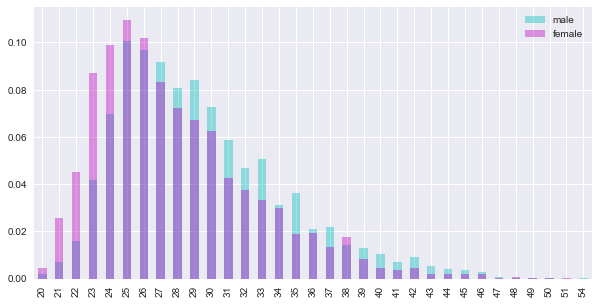

In [30]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age1 = male1['age'].value_counts(dropna=False, normalize=True).sort_index()
count_age1.plot(kind = "bar",color="c", alpha=.4)

fcount_age1 = female1['age'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age1.plot(kind = "bar",color="m", alpha=.4)

#Count_age1 = data1['age'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age1.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

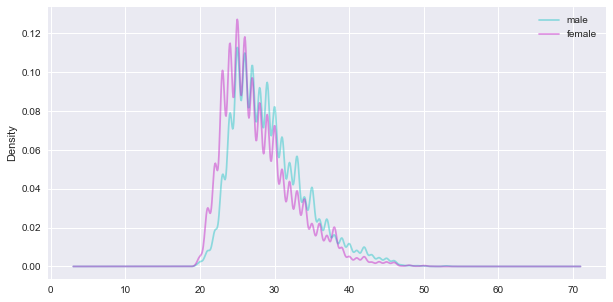

In [96]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age1 = male1['age']
count_age1.plot(kind = "kde",color="c", alpha=.4)

fcount_age1 = female1['age']
fcount_age1.plot(kind = "kde",color="m", alpha=.4)

#Count_age1 = data1['age'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age1.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

#### action_type=2の男性、女性　、性別関係なく比較

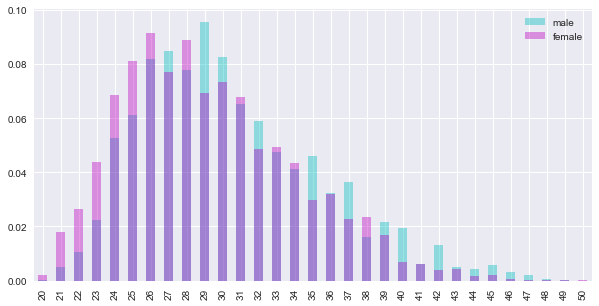

In [31]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age2 = male2['age'].value_counts(dropna=False, normalize=True).sort_index()
count_age2.plot(kind = "bar",color="c", alpha=.4)

fcount_age2 = female2['age'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age2.plot(kind = "bar",color="m", alpha=.4)

#ount_age2 = data1['age'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age2.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

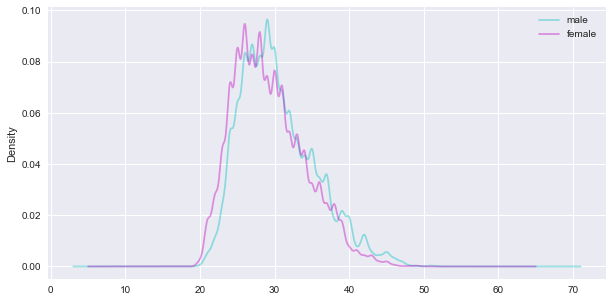

In [97]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age2 = male2['age']
count_age2.plot(kind = "kde",color="c", alpha=.4)

fcount_age2 = female2['age']
fcount_age2.plot(kind = "kde",color="m", alpha=.4)

#ount_age2 = data1['age'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age2.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

#### action_type=3の男性、女性　、性別関係なく比較

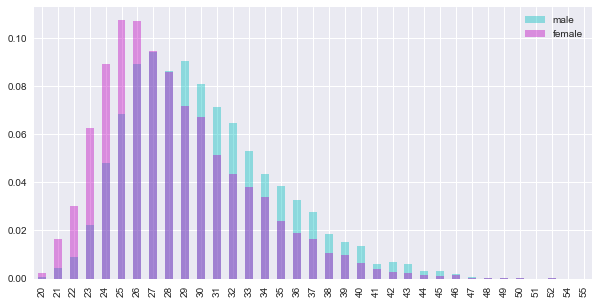

In [92]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['age'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['age'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['age'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

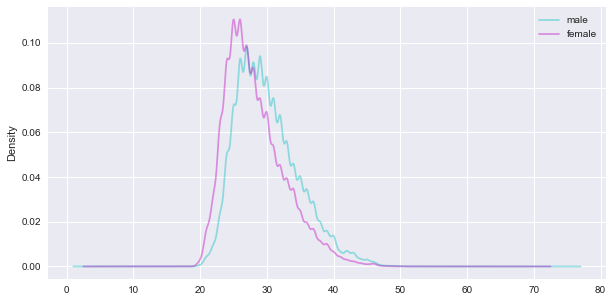

In [95]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['age']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['age']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['age']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

#### 男性のaction_type重ねたver

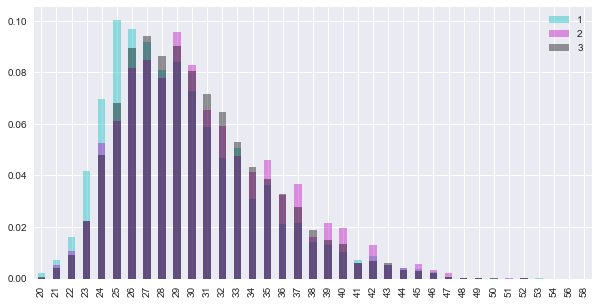

In [33]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age1 = male1['age'].value_counts(dropna=False, normalize=True).sort_index()
count_age1.plot(kind = "bar",color="c", alpha=.4)

count_age2 = male2['age'].value_counts(dropna=False, normalize=True).sort_index()
count_age2.plot(kind = "bar",color="m", alpha=.4)

count_age3 = male3['age'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar" ,color="k", alpha=.4)

plt.legend(["1","2","3"]) # 凡例を表示

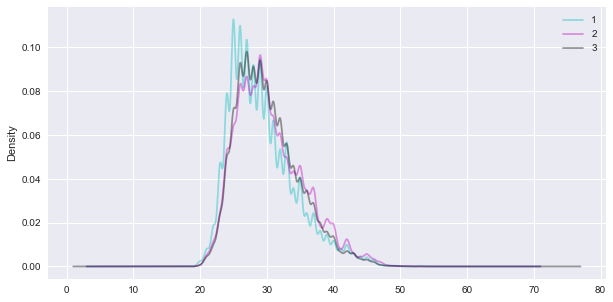

In [98]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age1 = male1['age']
count_age1.plot(kind = "density",color="c", alpha=.4)

count_age2 = male2['age']
count_age2.plot(kind = "density",color="m", alpha=.4)

count_age3 = male3['age']
count_age3.plot(kind = "density" ,color="k", alpha=.4)

plt.legend(["1","2","3"]) # 凡例を表示

#### 女性のaction_type重ねたver

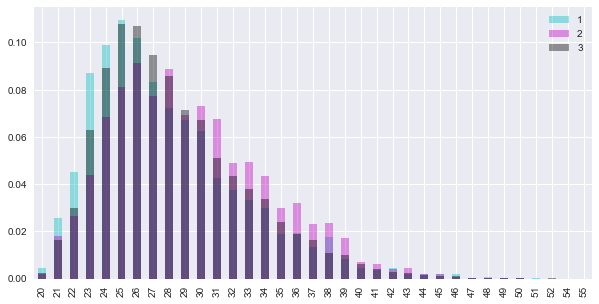

In [34]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

fcount_age1 = female1['age'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age1.plot(kind = "bar",color="c", alpha=.4)

fcount_age2 = female2['age'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age2.plot(kind = "bar",color="m", alpha=.4)

fcount_age3 = female3['age'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar" ,color="k", alpha=.4)

plt.legend(["1","2","3"]) # 凡例を表示

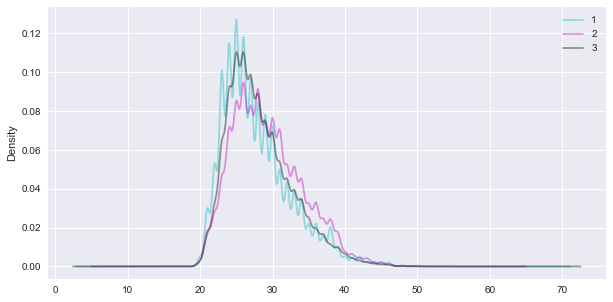

In [99]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

fcount_age1 = female1['age']
fcount_age1.plot(kind = "density",color="c", alpha=.4)

fcount_age2 = female2['age']
fcount_age2.plot(kind = "density",color="m", alpha=.4)

fcount_age3 = female3['age']
fcount_age3.plot(kind = "density" ,color="k", alpha=.4)

plt.legend(["1","2","3"]) # 凡例を表示

#### 全体のaction_type重ねたver

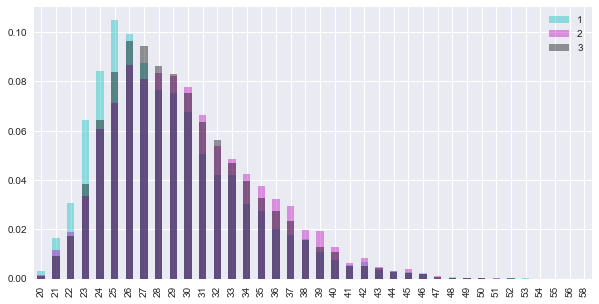

In [35]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

Count_age1 = data1['age'].value_counts(dropna=False, normalize=True).sort_index()
Count_age1.plot(kind = "bar",color="c", alpha=.4)

Count_age2 = data2['age'].value_counts(dropna=False, normalize=True).sort_index()
Count_age2.plot(kind = "bar",color="m", alpha=.4)

Count_age3 = data3['age'].value_counts(dropna=False, normalize=True).sort_index()
Count_age3.plot(kind = "bar" ,color="k", alpha=.4)

plt.legend(["1","2","3"]) # 凡例を表示

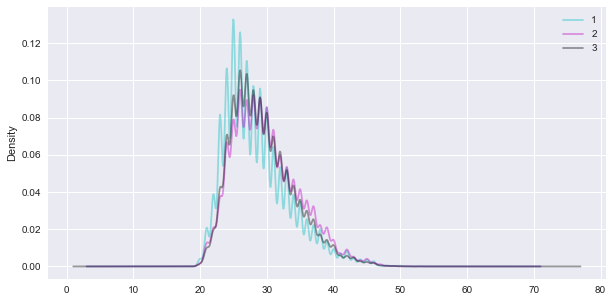

In [100]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

Count_age1 = data1['age']
Count_age1.plot(kind = "density",color="c", alpha=.4)

Count_age2 = data2['age']
Count_age2.plot(kind = "density",color="m", alpha=.4)

Count_age3 = data3['age']
Count_age3.plot(kind = "density" ,color="k", alpha=.4)

plt.legend(["1","2","3"]) # 凡例を表示

#### eventの月ごとのaction_type=3 比較

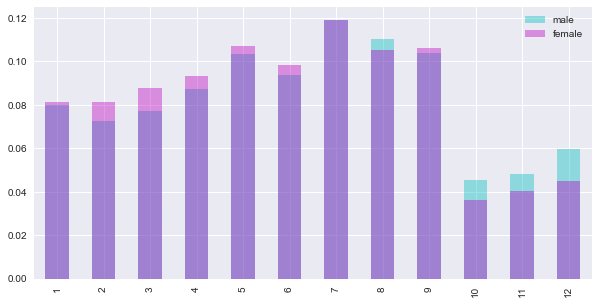

In [36]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_month'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['event_month'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['event_month'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

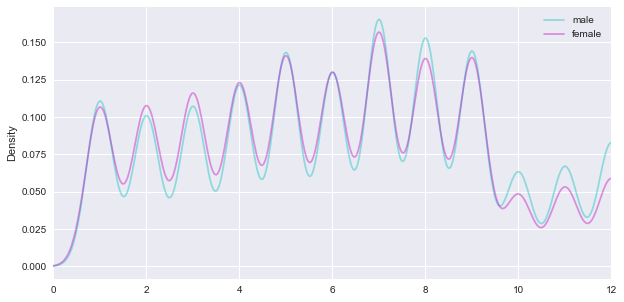

In [117]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_month']
count_age3.plot(kind = "density",color="c", alpha=.4)

fcount_age3 = female3['event_month']
fcount_age3.plot(kind = "density",color="m", alpha=.4)

#Count_age3 = data3['event_month']
#Count_age3.plot(kind = "density",color="k", alpha=.4)

plt.xlim(0,12)
plt.legend(["male","female","all"]) # 凡例を表示

#### event開始時間ごとのaction_type=３ 比較

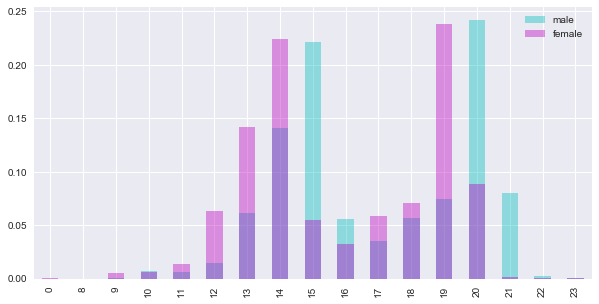

In [37]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_hour'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['event_hour'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['event_hour'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

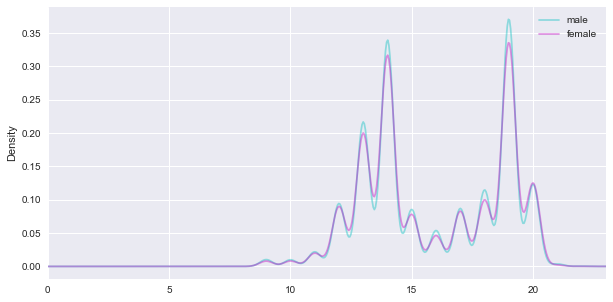

In [118]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_hour']
count_age3.plot(kind = "density",color="c", alpha=.4)

fcount_age3 = female3['event_hour']
fcount_age3.plot(kind = "density",color="m", alpha=.4)

#Count_age3 = data3['event_hour']
#Count_age3.plot(kind = "density",color="k", alpha=.4)

plt.xlim(0,23)
plt.legend(["male","female","all"]) # 凡例を表示

#### event曜日ごとのaction_type=３ 比較（日曜日=0）

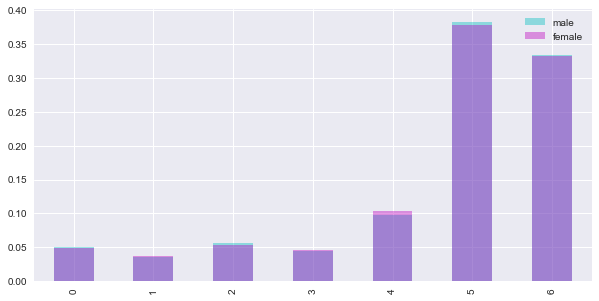

In [38]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_weekday'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['event_weekday'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['event_weekday'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

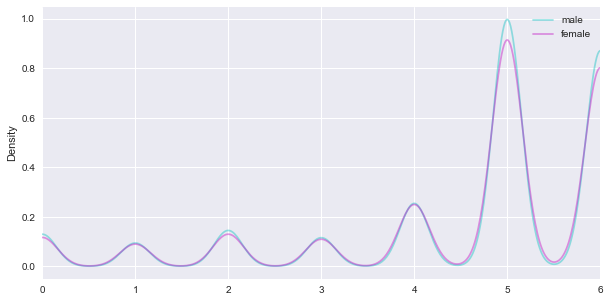

In [119]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_weekday']
count_age3.plot(kind = "density",color="c", alpha=.4)

fcount_age3 = female3['event_weekday']
fcount_age3.plot(kind = "density",color="m", alpha=.4)

#Count_age3 = data3['event_weekday']
#Count_age3.plot(kind = "density",color="k", alpha=.4)

plt.xlim(0,6)
plt.legend(["male","female","all"]) # 凡例を表示

#### event日にちごとのaction_type=３ 比較

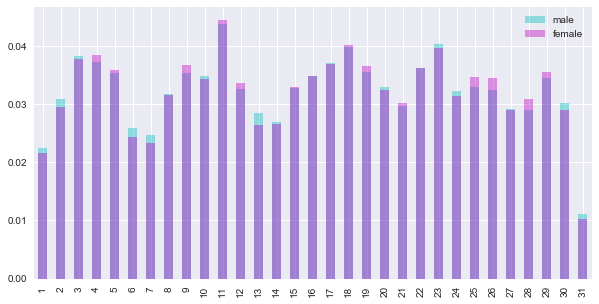

In [39]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_day'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['event_day'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['event_day'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

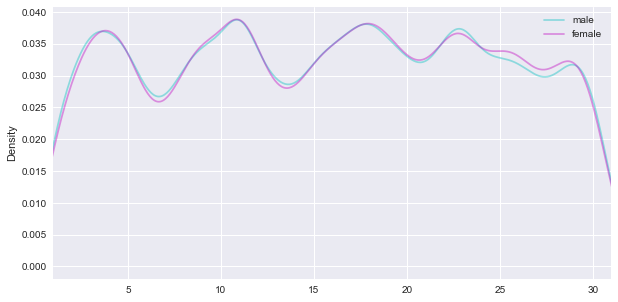

In [120]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_day']
count_age3.plot(kind = "density",color="c", alpha=.4)

fcount_age3 = female3['event_day']
fcount_age3.plot(kind = "density",color="m", alpha=.4)

#Count_age3 = data3['event_day']
#Count_age3.plot(kind = "density",color="k", alpha=.4)

plt.xlim(1,31)
plt.legend(["male","female","all"]) # 凡例を表示

#### event地域ごとのaction_type=３ 比較

 ["北海道","青森県","岩手県","宮城県","秋田県", 5
"山形県", "福島県", "茨城県","栃木県","群馬県", 10
"埼玉県","千葉県","東京都","神奈川県","新潟県", 15
"富山県","石川県","福井県","山梨県","長野県", 20
"岐阜県","静岡県","愛知県","三重県","滋賀県", 25
"京都府","大阪府","兵庫県","奈良県","和歌山県", 30
"鳥取県","島根県","岡山県","広島県","山口県", 35
"徳島県","香川県","愛媛県","高知県","福岡県", 40
"佐賀県","長崎県","熊本県","大分県","宮崎県", 45
  "鹿児島県","沖縄県",'その他（海外等）']     48

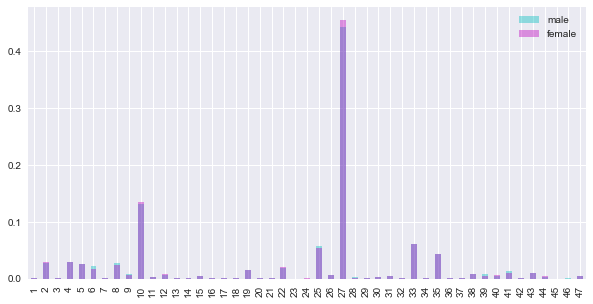

In [40]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_prefecture'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['event_prefecture'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['event_prefecture'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

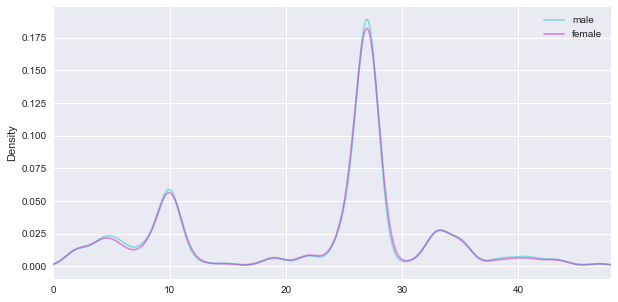

In [121]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_prefecture']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['event_prefecture']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['event_prefecture']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)

plt.xlim(0,48)
plt.legend(["male","female","all"]) # 凡例を表示

LAbelEncorderの順番付けが謎　東京:27　10:大阪　25:愛知 33:神奈川　35:福岡 19:岡山 22:広島 2:京都　4:兵庫　5:北海道 6:千葉 8:埼玉　

#### 女性の上限年齢はaction_type=3にどう影響するのか

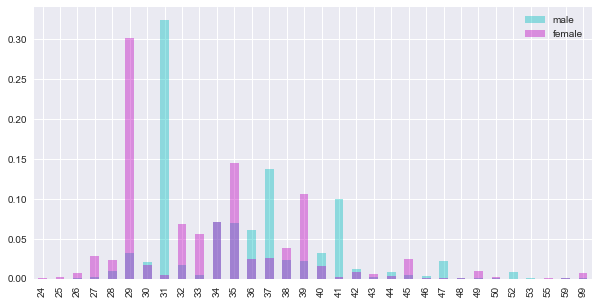

In [84]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['female_age_upper'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['female_age_upper'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['female_age_upper'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

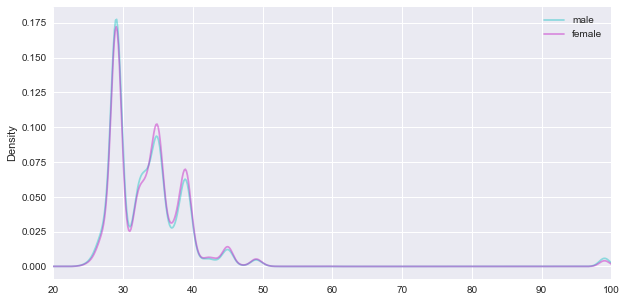

In [122]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['female_age_upper']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['female_age_upper']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['female_age_upper']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)

plt.xlim(20,100)
plt.legend(["male","female","all"]) # 凡例を表示

#### 女性の下限年齢はaction_type=3にどう影響するのか

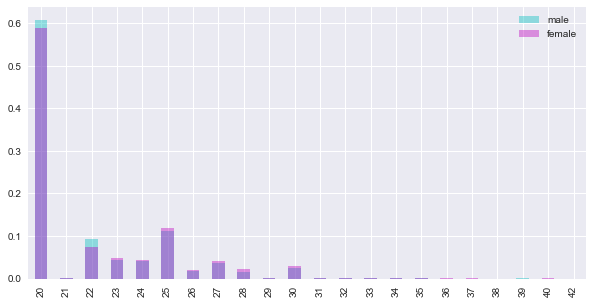

In [42]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['female_age_lower'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['female_age_lower'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['female_age_lower'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

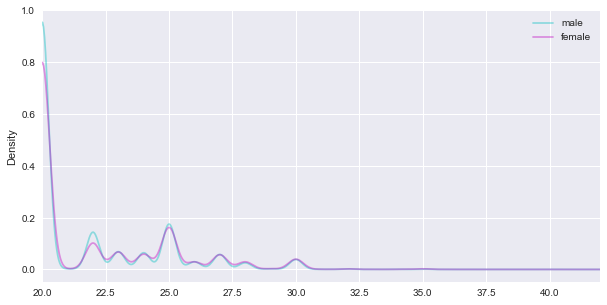

In [123]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['female_age_lower']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['female_age_lower']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['female_age_lower']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)

plt.xlim(20,42)
plt.legend(["male","female","all"]) # 凡例を表示

#### 男性の上限年齢はaction_type=3にどう影響するのか

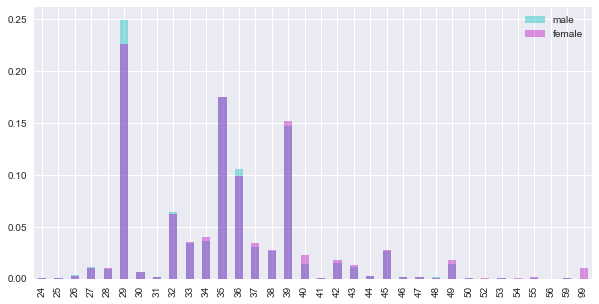

In [43]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['male_age_upper'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['male_age_upper'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['male_age_upper'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

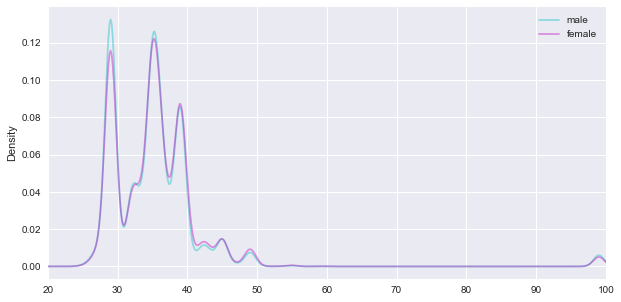

In [124]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['male_age_upper']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['male_age_upper']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['male_age_upper']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)
plt.xlim(20,100)
plt.legend(["male","female","all"]) # 凡例を表示

#### 男性の下限年齢はaction_type=3にどう影響するのか

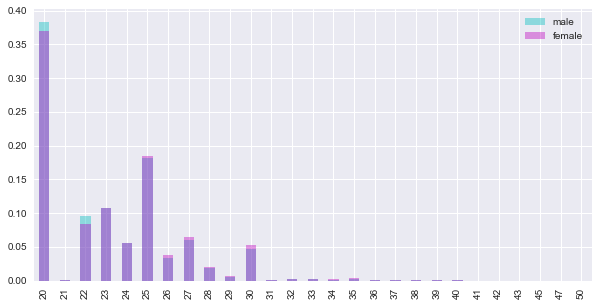

In [109]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['male_age_lower'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['male_age_lower'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['male_age_lower'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

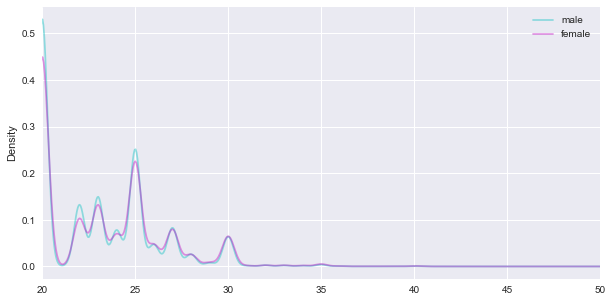

In [125]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['male_age_lower']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['male_age_lower']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['male_age_lower']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)
plt.xlim(20,50)
plt.legend(["male","female","all"]) # 凡例を表示

#### 男性の金額はaction_type=3にどう影響するのか

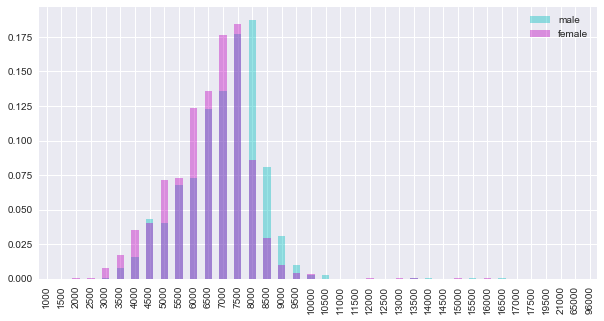

In [45]:

fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['male_price'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['male_price'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['male_price'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

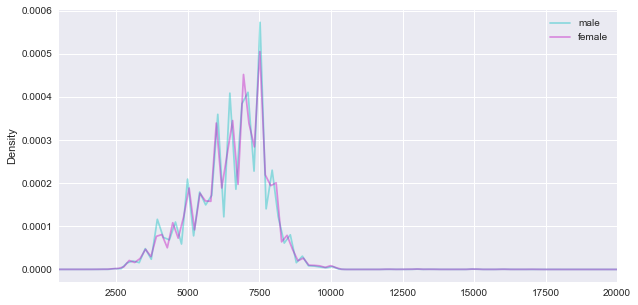

In [142]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['male_price']
count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['male_price']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['male_price']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)
plt.xlim(500,20000)
plt.legend(["male","female","all"]) # 凡例を表示

#### 女性の金額はaction_type=3にどう影響するのか

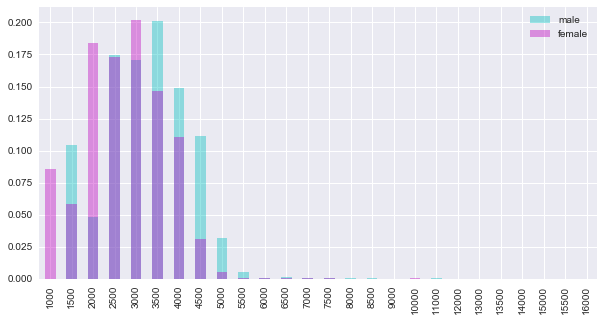

In [66]:
#グラフはbar or density
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['female_price'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['female_price'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['female_price'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

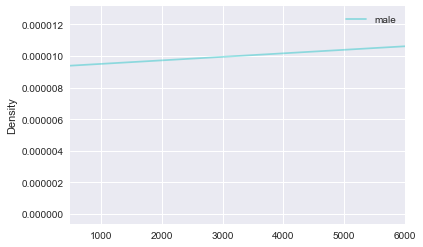

In [150]:
count_age3 = male3['female_price']
count_age3.plot(kind = "kde",color="c", alpha=.4)
plt.xlim(500,6000)
plt.legend(["male"]) # 凡例を表示

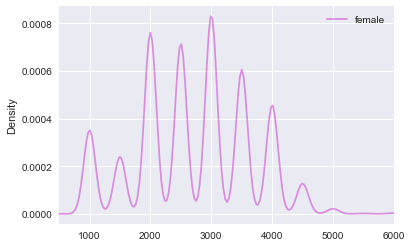

In [151]:
#count_age3 = male3['female_price']
#count_age3.plot(kind = "kde",color="c", alpha=.4)

fcount_age3 = female3['female_price']
fcount_age3.plot(kind = "kde",color="m", alpha=.4)

#Count_age3 = data3['female_price']
#Count_age3.plot(kind = "kde",color="k", alpha=.4)

plt.xlim(500,6000)
plt.legend(["female"]) # 凡例を表示

#### user地域とevent地域の散布図　action_type=3

In [48]:
scatter_data3 = data3.loc[:,['event_prefecture','user_prefecture']]
scatter_data3.head()

,event_prefecture,user_prefecture
0,27,43
1279,8,43
1280,8,43
1281,8,43
1282,8,43


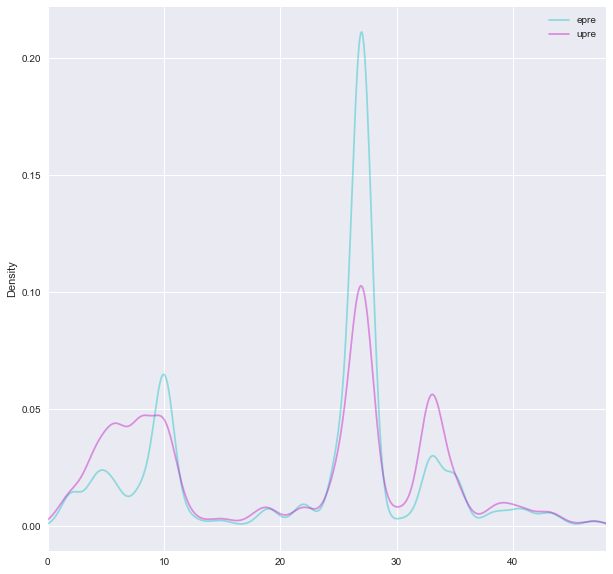

In [171]:
fig = plt.figure(figsize=(10,10)) # figureオブジェクト作成
count_epre = scatter_data3['event_prefecture']
count_epre.plot(kind = "kde",color="c", alpha=.4)

count_upre = scatter_data3['user_prefecture']
count_upre.plot(kind = "kde",color="m", alpha=.4)

plt.xlim(0,48)
plt.legend(["epre","upre"]) # 凡例を表示

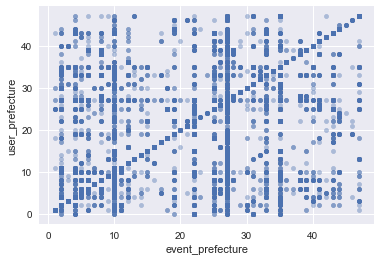

In [63]:
fig = plt.figure(figsize=(20,20)) # figureオブジェクト作成
scatter_data3.plot.scatter(x="event_prefecture",y="user_prefecture",alpha=.4)